<div align="center">

#### Uczenie maszynowe | Inżynieria i Analiza Danych
# Inżynieria cech - part 1  
### Mateusz Bugdol  
### Nr indeksu: 419719  
### Grupa ćwiczeniowa: 1 
 
</div>

1. Ładuję odpowiednie biblioteki

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Tworze DataFrame "Titanic" przy użyciu pandasa i wstępne zapoznanie sie z datasetem

In [2]:
titanic = pd.read_csv("../data/titanic.csv", header=None, sep = ",", quotechar='"', na_values=["?","nan"])

cols = [
    "pclass", "survived", "name", "sex",
    "age", "sibsp", "parch", "ticket", "fare",
    "cabin", "embarked", "boat", "body", "home.dest"
]

titanic.columns = cols

print(titanic.head(n=20))

print(titanic.shape[0])

    pclass  survived                                               name  \
0        1         1                      Allen, Miss. Elisabeth Walton   
1        1         1                     Allison, Master. Hudson Trevor   
2        1         0                       Allison, Miss. Helen Loraine   
3        1         0               Allison, Mr. Hudson Joshua Creighton   
4        1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1         1                                Anderson, Mr. Harry   
6        1         1                  Andrews, Miss. Kornelia Theodosia   
7        1         0                             Andrews, Mr. Thomas Jr   
8        1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1         0                            Artagaveytia, Mr. Ramon   
10       1         0                             Astor, Col. John Jacob   
11       1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12       1         1     

W datasecie widnieje 1309 wierszy i 14 cech:
 - pclass - klasa pasażera na statku - na pierwszych 20 obserwacjach widnieją pasażerowie tylko z pierwszej klasy
 - survived - przeżycie katastrofy (0/1) - jest to zmienna binarna, gdzie 1 oznacza przeżycie, a 0 śmierć
 - name - imiona i nazwiska pasażerów - pełne imienia z nazwiskiem w formacie <nazwisko>, <tytuł> <pierwsze imię> <ewentualne drugie imię>
 - sex - płeć pasażera - female (kobieta) lub male (mężczyzna)
 - age - wiek pasażera - widnieje jedna wartość NaN oraz wiek po przecinku (prawdopodobnie wiek dziecka został podany w miesiącach 11/12 = 0.9167)
 - sibsp - nie wiem co to może oznaczać, z pewnością powiązane z rodziną/rodzeństwem
 - parch - nie wiem co to może oznaczać, chyba powiązane z ilością członków rodziny (połaczenie słowa parents i children)
 - ticket - numer biletu pasażera - numer biletu może zawierać numer lub litery "PC" wraz z numerem
 - fare - opłata za rejs pasażera - jeden z pasażerów nie zapłacił za bilet lub 0 oznacza brak danych
 - cabin - miejsce noclegu pasażera oznaczone literką i numerem - większość pól jest wypełniona, występuje kilka brakujących wartości
 - embarked - miejsce wejścia na pokład pasażera - na pierwszych 20 rekordach widzimy S oznaczjące prawdopodobnie Southampton oraz C oznaczające Cherbourg
 - boat - identyfikator łodzi, w której pasażer został uratowany - widzimy brakujące dane, które są powiązane z survived równym 0
 - body - numer identyfikacyjny ciała w przypadku śmierci pasażera - większość danych jest brakująca z powodu przeżycia pasażerów
 - home.dest - miejsce zamieszkania pasażera - widnieje tylko 1 wartość NaN
 

3. Sprawdzam poprawność formatu kolumn oraz ilość brakujących danych

In [3]:
titanic["survived"] = titanic["survived"].astype(int)

print("--- Typy danych ---")
print(titanic.dtypes)

print("\n--- Ilość brakujących wartości w poszczególnych kolumnach ---")
# sprawdzam ilosc brakujacych wartosci w kazdej kolumnie
print(titanic.isnull().sum())

print("\n--- Ilość brakujących wartości w poszczególnych kolumnach (procentowo) ---")
# sprawdzam jaki procent to wartości NaN
print(titanic.isnull().mean()* 100)

--- Typy danych ---
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

--- Ilość brakujących wartości w poszczególnych kolumnach ---
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

--- Ilość brakujących wartości w poszczególnych kolumnach (procentowo) ---
pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62

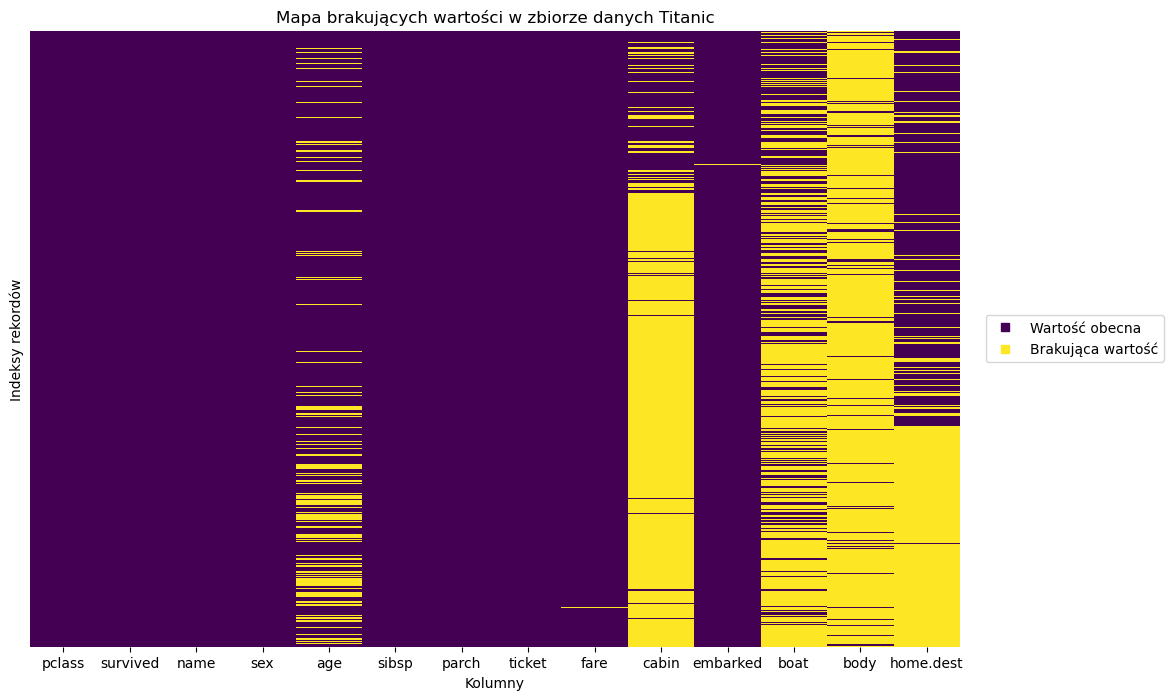

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Mapa brakujących wartości w zbiorze danych Titanic")
plt.xlabel("Kolumny")
plt.ylabel("Indeksy rekordów")
plt.plot([], [], marker='s', color='#440154', linestyle='', label='Wartość obecna')
plt.plot([], [], marker='s', color='#fde725', linestyle='', label='Brakująca wartość')

plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.show()

Na wykresie widać mapę braków danych — żółte pola pokazują brakujące wartości, a fioletowe te dostępne. Najwięcej braków występuje w kolumnach: cabin (77%), body (90%), boat (63%) oraz home.dest (43%), a mniejsze braki pojawiają się w age (20%), embarked (2 wartości) i fare (1 wartość). Pozostałe kolumny (pclass, survived, name, sex, sibsp, parch, ticket) są kompletne. Z wykresu od razu można powiedzieć, że braki danych z pewnością braki w kolumnach age, cabin, boat oraz body są ze sobą powiązane.

4. Sprawdzam jaki typ braków danych mamy w kolumnie "age"

In [5]:
titanic_age_nan = titanic[titanic['age'].isnull()]
titanic_age = titanic[titanic['age'].notnull()]

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'age' ---")
print(titanic_age_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'age' ---")
print(titanic_age.isnull().mean())

# Sprawdzam ilość danycgh pclass w titanic_age_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'age' ---")
print(titanic_age_nan['pclass'].value_counts())

print("\n--- Ilość wartości w 'survived' dla brakujących 'age' ---")
# Sprawdzam ilość danycgh survived w titanic_fare_nan
print(titanic_age_nan['survived'].value_counts())

print("\n--- Ilość wartości w 'sex' dla brakujących 'age' ---")
# Sprawdzam ilość danycgh sex w titanic_fare_nan
print(titanic_age_nan['sex'].value_counts())

titanic_age_test = titanic.copy()
titanic_age_test["KolumnaNull"] = np.where(titanic_age_test["age"].isnull(), 1, 0)

print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")
print(titanic_age_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_age_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_age_test.groupby("sex")["KolumnaNull"].mean())


--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'age' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          1.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.912548
embarked     0.000000
boat         0.737643
body         0.996198
home.dest    0.771863
dtype: float64

--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'age' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000956
cabin        0.739962
embarked     0.001912
boat         0.601338
body         0.885277
home.dest    0.345124
dtype: float64

--- Ilość wartości w 'pclass' dla brakujących 'age' ---
pclass
3    208
1     39
2     16
Name: count, dtype: int64

--- Ilość wartości w 'survived' dla brakujących 'age' ---
survived
0    190
1 

Braki wieku nie są przypadkowe — pasażerowie bez age mają duże braki w innych zmiennych (np. cabine, boat lub body), a częstość braków różni się między grupami pclass, survived i sex. Widać również, że częstość NaN-ów w poszczególnych klasach, przeżyciu i płci jest mniej więcej tak samo prawdopodobna. Oznacza to, że brak wieku zależy od innych obserwowalnych cech, co wskazuje na MAR (Missing Data at Random).

5. Sprawdzam jaki typ braków danych mamy w kolumnie "fare"

In [6]:
titanic_fare_nan = titanic[titanic['fare'].isnull()]
titanic_fare = titanic[titanic['fare'].notnull()]

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'fare' ---")
print(titanic_fare_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'fare' ---")
print(titanic_fare.isnull().mean())

# Sprawdzam ilość danycgh pclass w titanic_fare_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'fare' ---")
print(titanic_fare_nan['pclass'].value_counts())

# Sprawdzam ilość danycgh survived w titanic_fare_nan
print("\n--- Ilość wartości w 'survived' dla brakujących 'fare' ---")
print(titanic_fare_nan['survived'].value_counts())

print("\n--- Ilość wartości w 'sex' dla brakujących 'fare' ---")
print(titanic_fare_nan['sex'].value_counts())

titanic_fare_test = titanic.copy()
titanic_fare_test["KolumnaNull"] = np.where(titanic_fare_test["fare"].isnull(), 1, 0)

print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")
print(titanic_fare_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_fare_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_fare_test.groupby("sex")["KolumnaNull"].mean())


--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'fare' ---
pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         1.0
cabin        1.0
embarked     0.0
boat         1.0
body         0.0
home.dest    1.0
dtype: float64

--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'fare' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.201070
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.774465
embarked     0.001529
boat         0.628440
body         0.908257
home.dest    0.430428
dtype: float64

--- Ilość wartości w 'pclass' dla brakujących 'fare' ---
pclass
3    1
Name: count, dtype: int64

--- Ilość wartości w 'survived' dla brakujących 'fare' ---
survived
0    1
Name: count, dtype: int64

--- Ilość wartości w 'sex' dla brakujących 'fare' ---
sex
male 

W kolumnie fare brakuje wartości dotyczących tylko jednego pasażera, co uniemożliwia dokładne zbadanie zależności między innymi zmiennymi. Z tego powodu jeden brak nie stanowi wzorca ani nie wskazuje na powiązania z innymi cechami pasażerów. Uważam, że najbardziej prawdopodobne jest uznanie tego braku za MCAR (Missing Data Completely At Random).

6. Sprawdzam jaki typ braków danych mamy w kolumnie "cabin"

In [7]:
titanic_cabin_nan = titanic[titanic['cabin'].isnull()]
titanic_cabin = titanic[titanic['cabin'].notnull()]

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'cabin' ---")
print(titanic_cabin_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'cabin' ---")
print(titanic_cabin.isnull().mean())

# Sprawdzam ilość danych pclass w titanic_cabin_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'cabin' ---")
print(titanic_cabin_nan['pclass'].value_counts())

print("\n--- Ilość wartości w 'survived' dla brakujących 'cabin' ---")
# Sprawdzam ilość danych survived w titanic_cabin_nan
print(titanic_cabin_nan['survived'].value_counts())

print("\n--- Ilość wartości w 'sex' dla brakujących 'cabin' ---")
# Sprawdzam ilość danycgh sex w titanic_fare_nan
print(titanic_cabin_nan['sex'].value_counts())


titanic_cabin_test = titanic.copy()
titanic_cabin_test["KolumnaNull"] = np.where(titanic_cabin_test["cabin"].isnull(), 1, 0)

print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")
print(titanic_cabin_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_cabin_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_cabin_test.groupby("sex")["KolumnaNull"].mean())


--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'cabin' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.236686
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000986
cabin        1.000000
embarked     0.000000
boat         0.711045
body         0.912229
home.dest    0.519724
dtype: float64

--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'cabin' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.077966
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.000000
embarked     0.006780
boat         0.345763
body         0.891525
home.dest    0.125424
dtype: float64

--- Ilość wartości w 'pclass' dla brakujących 'cabin' ---
pclass
3    693
2    254
1     67
Name: count, dtype: int64

--- Ilość wartości w 'survived' dla brakujących 'cabin' ---
survived
0  

Braki w kolumnie cabin są zdecydowanie nielosowe: znacznie częściej dotyczą pasażerów klasy trzeciej oraz dużej części klasy drugiej (źródło: [Kabiny trzeciej klasy](https://titanic.com.pl/galeria,wnetrza,kabiny_trzeciej_klasy)), a także w większym stopniu mężczyzn i osób, które nie przeżyły. Wynika to z samej natury tej zmiennej — wielu pasażerów niższych klas nie miało przypisanych kabin lub mieszkało w wieloosobowych przedziałach, które nie były dokumentowane. Brak informacji o kabinie nie jest więc przypadkowy, lecz odzwierciedla rzeczywistą sytuację, przez co uważam, że mamy do czynienia MNAR (Missing Data Not At Random).

7. Sprawdzam jaki typ braków danych mamy w kolumnie "embarked"

In [8]:
titanic_embarked_nan = titanic[titanic['embarked'].isnull()]
titanic_embarked = titanic[titanic['embarked'].notnull()]

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'embarked' ---")
print(titanic_embarked_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'embarked' ---")
print(titanic_embarked.isnull().mean())

# Sprawdzam ilość danych pclass w titanic_embarked_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'embarked' ---")
print(titanic_embarked_nan['pclass'].value_counts())

print("\n--- Ilość wartości w 'survived' dla brakujących 'embarked' ---")
# Sprawdzam ilość danych survived w titanic_embarked_nan
print(titanic_embarked_nan['survived'].value_counts())

print("\n--- Ilość wartości w 'sex' dla brakujących 'embarked' ---")
# Sprawdzam ilość danych survived w titanic_embarked_nan
print(titanic_embarked_nan['sex'].value_counts())

titanic_embarked_test = titanic.copy()
titanic_embarked_test["KolumnaNull"] = np.where(titanic_embarked_test["embarked"].isnull(), 1, 0)
print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")
print(titanic_embarked_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_embarked_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_embarked_test.groupby("sex")["KolumnaNull"].mean())


--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'embarked' ---
pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     1.0
boat         0.0
body         1.0
home.dest    0.5
dtype: float64

--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'embarked' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.201224
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000765
cabin        0.775822
embarked     0.000000
boat         0.629686
body         0.907422
home.dest    0.430757
dtype: float64

--- Ilość wartości w 'pclass' dla brakujących 'embarked' ---
pclass
1    2
Name: count, dtype: int64

--- Ilość wartości w 'survived' dla brakujących 'embarked' ---
survived
1    2
Name: count, dtype: int64

--- Ilość wartości w 'sex' dla brakujących 'emb

Brakujące wartości w kolumnie embarked dotyczą jedynie dwóch pasażerek z pierwszej klasy, co oznacza, że nie możemy bezpośrednio powiedzieć czy nie tworzą żadnego wyraźnego wzorca zależnego od innych zmiennych. Przy tak małej liczbie braków nie można mówić o  zależności, dlatego uznaje te braki jako MCAR (Missing Data Completely At Random).

8. Sprawdzam jaki typ braków danych mamy w "boat" 

In [9]:
titanic_boat_nan = titanic[titanic['boat'].isnull()]
titanic_boat = titanic[titanic['boat'].notnull()]

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'boat' ---")
print(titanic_boat_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'boat' ---")
print(titanic_boat.isnull().mean())

# Sprawdzam ilość danych pclass w titanic_boat_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'boat' ---")
print(titanic_boat_nan['pclass'].value_counts())

# Sprawdzam ilość danych survived w titanic_boat_nan
print("\n--- Ilość wartości w 'survived' dla brakujących 'boat' ---")
print(titanic_boat_nan['survived'].value_counts())

titanic_boat_test = titanic.copy()
titanic_boat_test["KolumnaNull"] = np.where(titanic_boat_test["boat"].isnull(), 1, 0)
print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")

print(titanic_boat_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_boat_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_boat_test.groupby("sex")["KolumnaNull"].mean())


--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'boat' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.235723
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.001215
cabin        0.876063
embarked     0.000000
boat         1.000000
body         0.852977
home.dest    0.509113
dtype: float64

--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'boat' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.141975
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.602881
embarked     0.004115
boat         0.000000
body         1.000000
home.dest    0.298354
dtype: float64

--- Ilość wartości w 'pclass' dla brakujących 'boat' ---
pclass
3    536
2    165
1    122
Name: count, dtype: int64

--- Ilość wartości w 'survived' dla brakujących 'boat' ---
survived
0    80

Braki w kolumnie boat są wyraźnie nielosowe: najczęściej dotyczą pasażerów trzeciej klasy, w zdecydowanej większości osób, które nie przeżyły, oraz częściej mężczyzn. Osoby bez wpisanej łodzi mają również znacznie więcej braków w innych cechach, takich jak cabin, body czy home.dest. Wynika to z samej natury tej zmiennej. Większość pasażerów nie została przypisana do żadnej łodzi ratunkowej, co wiązało się z klasą, płcią i realnymi szansami ewakuacji (Żródło: [Katastrofa](https://titanic.com.pl/katastrofa)). Brak tej informacji nie jest przypadkowy, lecz odzwierciedla rzeczywistą sytuację, dlatego mamy tutaj mechanizm MNAR (Missing Data Not At Random).

9. Sprawdzam jaki typ braków danych mamy w kolumnie "body"

In [10]:
titanic_body_nan = titanic[titanic['body'].isnull()]
titanic_body = titanic[titanic['body'].notnull()]

print("\n--- Unikalne wartości w 'body' ---")
print(sorted(titanic['body'].unique()))

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'body' ---")
print(titanic_body_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'body' ---")
print(titanic_body.isnull().mean())

# Sprawdzam ilość danych pclass w titanic_body_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'body' ---")
print(titanic_body_nan['pclass'].value_counts())

# Sprawdzam ilość danych survived w titanic_body_nan
print("\n--- Ilość wartości w 'survived' dla brakujących 'body' ---")
print(titanic_body_nan['survived'].value_counts())

print("\n--- Ilość wartości w 'sex' dla brakujących 'body' ---")
# Sprawdzam ilość danycgh sex w titanic_fare_nan
print(titanic_body_nan['sex'].value_counts())

# Sprawdzam ilość osób z 3 klasy, które mają uzupełnioną wartość body
print("\n--- Ilość wartości w 'pclass' dla uzupełnionych 'body' ---")
print(titanic_body['pclass'].value_counts())

titanic_body_test = titanic.copy()
titanic_body_test["KolumnaNull"] = np.where(titanic_body_test["body"].isnull(), 1, 0)
print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")
print(titanic_body_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_body_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_body_test.groupby("sex")["KolumnaNull"].mean())


--- Unikalne wartości w 'body' ---
[np.float64(1.0), np.float64(22.0), np.float64(nan), np.float64(4.0), np.float64(7.0), np.float64(9.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(32.0), np.float64(35.0), np.float64(37.0), np.float64(38.0), np.float64(43.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(50.0), np.float64(51.0), np.float64(52.0), np.float64(53.0), np.float64(58.0), np.float64(61.0), np.float64(62.0), np.float64(67.0), np.float64(68.0), np.float64(69.0), np.float64(70.0), np.float64(72.0), np.float64(75.0), np.float64(79.0), np.float64(80.0), np.float64(81.0), np.float64(89.0), np.float64(96.0), np.float64(97.0), np.float64(98.0), np.float64(101.0), np.float64(103.0), np.float64(108.0), np.float64(109.0), np.float64(110.0), np.float64(119.0), np.float64(120.0), np.float64(121.0), np.float64(122.0), np.float64(124.0), np.float64(126.0), np.float64(130.0), np.float64(131.0), n

Zmienna body prawdopodobnie oznacza numer nadany odnalezionym i zidentyfikowanym ciałom pasażerów. To tłumaczy, dlaczego wśród osób, które przeżyły, praktycznie zawsze występuje brak tej wartości oraz dlaczego w numeracji pojawiają się luki (np. brak numerów 5 i 6). Nie wszystkie ciała zostały odnalezione lub rozpoznane. Braki body współwystępują też z brakami w takich zmiennych jak cabin, embarked, boat czy home.dest, co wskazuje, że pełna dokumentacja była dostępna tylko dla niektórych pasażerów. Z tego względu brak wartości body wynika bezpośrednio z tego, że ciało pasażera nie zostało znalezione lub nie nadano mu identyfikatora, czyli z samej natury tej zmiennej. Oznacza to mechanizm MNAR (Missing Data Not At Random).

10. Sprawdzam jaki typ braków danych mamy w kolumnie home.dest

In [11]:
titanic_home_nan = titanic[titanic['home.dest'].isnull()]
titanic_home = titanic[titanic['home.dest'].notnull()]

print("\n--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'home.dest' ---")
print(titanic_home_nan.isnull().mean())
print("\n--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'home.dest' ---")
print(titanic_home.isnull().mean())

# Sprawdzam ilość danych pclass w titanic_body_nan
print("\n--- Ilość wartości w 'pclass' dla brakujących 'home.dest' ---")
print(titanic_home_nan['pclass'].value_counts())

# Sprawdzam ilość danych survived w titanic_body_nan
print("\n--- Ilość wartości w 'survived' dla brakujących 'home.dest' ---")
print(titanic_home_nan['survived'].value_counts())

print("\n--- Ilość wartości w 'sex' dla brakujących 'home.dest' ---")
# Sprawdzam ilość danycgh sex w titanic_fare_nan
print(titanic_home_nan['sex'].value_counts())

titanic_home_test = titanic.copy()
titanic_home_test["KolumnaNull"] = np.where(titanic_home_test["home.dest"].isnull(), 1, 0)
print("\n--- Średnia wartość KolumnaNull w grupach 'pclass', 'survived', 'sex' ---")
print(titanic_home_test.groupby("pclass")["KolumnaNull"].mean())
print(titanic_home_test.groupby("survived")["KolumnaNull"].mean())
print(titanic_home_test.groupby("sex")["KolumnaNull"].mean())


--- Procent brakujących wartości w poszczególnych kolumnach z NaN w'home.dest' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.359929
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.001773
cabin        0.934397
embarked     0.001773
boat         0.742908
body         0.914894
home.dest    1.000000
dtype: float64

--- Procent brakujących wartości w poszczególnych kolumnach bez NaN w'home.dest' ---
pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.080537
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.653691
embarked     0.001342
boat         0.542282
body         0.902013
home.dest    0.000000
dtype: float64

--- Ilość wartości w 'pclass' dla brakujących 'home.dest' ---
pclass
3    514
1     34
2     16
Name: count, dtype: int64

--- Ilość wartości w 'survived' dla brakujących 'home.dest' 

Braki w kolumnie home.dest nie są losowe, ponieważ ich częstość wyraźnie różni się między grupami pclass, survived i sex. Najwięcej braków występuje u pasażerów trzeciej klasy, znacznie mniej w klasie pierwszej i drugiej, a braki są też częstsze wśród osób, które nie przeżyły oraz wśród mężczyzn. Oznacza to, że występowanie braków silnie zależy od obserwowalnych cech pasażerów, dlatego mamy tutaj do czynienia z mechanizmem MNAR (Missing Not At Random).

11. Jak postąpić z brakami danych?

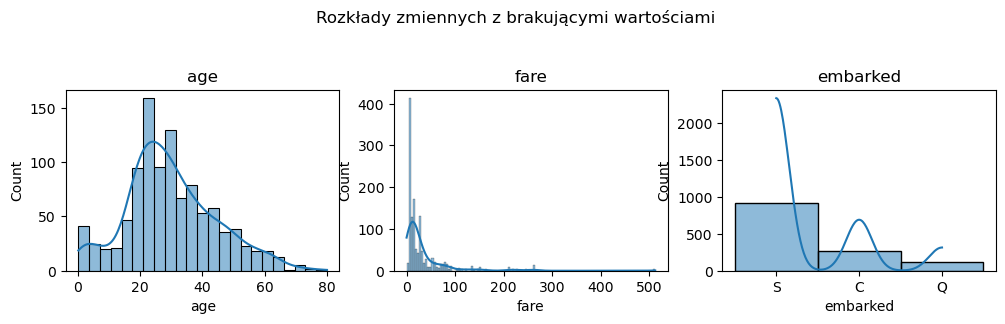

In [12]:
nan_cols = ['age', 'fare', 'embarked']

df = titanic[nan_cols]

plt.figure(figsize=(12, 8))

for i, col in enumerate(nan_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)

plt.suptitle("Rozkłady zmiennych z brakującymi wartościami")
plt.show()

Uzupełniłbym brakujące wartości w feature'ach w taki sposób:
- age - wykorzystałbym medianę wieku
- fare - pojedyncza wartość, skorzystałbym z mediany fare, ALE dla klasy dla której ten pojedynczy pasażer należy
- cabin - oznaczyłbym w postaci stringa jako "UNMARKED" lub "MISSING"
- embarked - wykorzystałbym najczęściej występującą wartość, czyli S oznaczające najprawdopodobniej Southampton
- boat - oznaczyłbym stringiem "MISSING"
- body - oznaczyłbym wartością 0 osoby, które przeżyły, a osoby, które nie przeżyły i nie zostały rozpoznane oznaczyłbym wysoką wartością np. 1000
- home.dest - oznaczyłbym jako string "MISSING"

12. Zakończenie

Wyniki:
- age - MAR
- fare - MCAR
- cabin - MNAR
- embarked - MCAR
- boat - MNAR
- body - MNAR
- home.dest - MNAR.

Patrząc na wnioski powyżej doszłem do konkluzji, że wiekszość braków danych ma związek z klasą pasażera. Pasażerowie z uboższych grup (w większości z 3 klasy, ale również 2) przez większą śmiertelność podaczas katastrofy, brak przypisanej kabiny oraz sytuację ekonomiczną zostali o wiele gorzej opisani w datasecie. w efekcie to właśnie ich dotyczą największe i najbardziej systematyczne braki informacji. Oznacza to, że większość braków danych nie wynika z przypadku, lecz z realnych różnic między grupami pasażerów. Dane były częściej uzupełniane dla osób z wyższych klas, które miały lepiej udokumentowane bilety, miejsca zamieszkania oraz większe szanse na przeżycie. Z kolei pasażerowie z niższych klas, pozbawieni własnych kabin, o niższym statusie społecznym i częściej ginący w katastrofie, pozostawili po sobie mniej ustrukturyzowanych informacji. W konsekwencji dominującym typem braków w zbiorze Titanic jest MNAR, co wskazuje, że brak danych sam w sobie niesie informację o pasażerze, czyli jego statusie, warunkach podróży i prawdopodobieństwie przeżycia.

<div align="center">

#### Uczenie maszynowe | Inżynieria i Analiza Danych
# Titanic - cardinality  
### Mateusz Bugdol  
### Nr indeksu: 419719  
### Grupa ćwiczeniowa: 1 
 
</div>

1. Sprawdź liczebność poszczególnych etykiet dla danych zmiennych jakościowych

In [13]:
print("\n--- Liczba unikalnych etykiet dla danych zmiennych jakościowych ---")
cols = ['name', 'pclass', 'survived', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']
for col in cols:
    if col != 'embarked':
        print('Liczba etykiet zmiennej {}: {}'.format(col, len(titanic[col].unique())))
    else:
        print('Liczba etykiet zmiennej {}: {}'.format(col, len(titanic[col].dropna().unique())))


--- Liczba unikalnych etykiet dla danych zmiennych jakościowych ---
Liczba etykiet zmiennej name: 1307
Liczba etykiet zmiennej pclass: 3
Liczba etykiet zmiennej survived: 2
Liczba etykiet zmiennej sex: 2
Liczba etykiet zmiennej ticket: 929
Liczba etykiet zmiennej cabin: 187
Liczba etykiet zmiennej embarked: 3
Liczba etykiet zmiennej boat: 28
Liczba etykiet zmiennej home.dest: 370


2. Wyświetl z użyciem funkcji print liczbę wszystkich pasażerów. Wykorzystaj podobny sposób jak w ptk 1.

In [14]:
print("\n--- Liczba wszystkich pasażerów ---")
print(f"Liczba pasażerów: {len(titanic)}")


--- Liczba wszystkich pasażerów ---
Liczba pasażerów: 1309


3. Skomentuj wyniki otrzymane w punkcie 1 i 2. Podziel zmienne ze względu na dużą i małą moc zbioru (kardynalność).

Jak widać z wyników powyżej największą kardynalność mają cechy:

    -   name    - bardzo dużo etykiet (1307), ponieważ prawie każda osoba ma inne imiona i nazwiska (kilka obserwacji ma takie same imię i nazwisko),
    -   ticket  - również duża liczba etykiet (929), ma to pewnie związek z tym, że każdy bilet miał swój unikalny numer,
    -   cabin   - w miarę duża ilość etykiet (186), ale należy pamiętać, że wiele z wartości są puste, kod kabiny zawiera litere i liczbę oraz w jednym rekordzie może być zapisane kilka kabin,
    -   home.dest   - w miarę duża liczba etykiet (369), ale należy pamiętać o tym że wiele wartości jest pustych (ok. 43 %) i etykiety niketóre się powtarzają,

oraz najniższą kardynalność mają cechy:

    -   pclass  - 3 unikalne etykiety związane z klasą do której należeli pasażerowie,
    -   survived - 2 unikalne etykiety oznaczające przeżycie,
    -   embarked    - 3 unikalne etykiety związane z portem, gdzie dany pasażer wszedł na pokład,
    -   boat - 27 unikalne wartości związane z numerem łodzi ratunkowej do której wsiadł dany pasażer,
    -   sex - 2 unikalne wartości związane z płcią pasażerów.

4. Sprawdź, ile unikalnych etykiet ma zmienna mówiąca o kabinie danego pasażera. Użyj takiej funkcji, która zwraca wynik w postaci NumPy array.

In [15]:
print("\n--- Ilość unikalnych kabin uwzględniając NaN (bez podziału) ---")
kabiny = np.unique(titanic['cabin'].dropna().astype(str).to_numpy())
print(len(kabiny) + 1)

print("\n--- Ilość unikalnych kabin uwzględniając NaN (z podziałem) ---")
cabin_unique_split = titanic['cabin'].dropna().str.split().explode()
kabiny_split = np.unique(cabin_unique_split.astype(str).to_numpy())
print(len(kabiny_split) + 1)


--- Ilość unikalnych kabin uwzględniając NaN (bez podziału) ---
187

--- Ilość unikalnych kabin uwzględniając NaN (z podziałem) ---
203


5. Zredukuj liczbę cech dla zmiennej opisującej kabiny poprzez zastąpienie obecnych etykiet w formacie LL11 do etykiet zawierających tylko pierwszą literę. Użyj astype(str).str[pozycja]. Nową zmienną nazwij CabinReduced. Wyświetl pierwsze 20 wierszy zbioru danych dla kolumn Cabin i CabinReduced

Należy mieć na uwadze, że może pojawić się etykieta zawierająca dwie literki lub więcej zamiast jednej. Sprawdźmy czy istnieją takie rekordy.

In [16]:
titanic[[len({part[0] for part in str(c).split()}) > 1 for c in titanic["cabin"]]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,A,NaN,"Perkins County, SD"
873,3,0,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,NaN,120.0,NaN
941,3,1,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C,10,NaN,NaN
994,3,0,"Mardirosian, Mr. Sarkis",male,NaN,0,0,2655,7.2292,F E46,C,NaN,NaN,NaN
1024,3,0,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,NaN,309.0,NaN
1122,3,1,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,D,NaN,NaN
1217,3,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,NaN,NaN,NaN


Jak widzimy powyżej istnieją obserwacje zawierające w cabin 2 literki (każdy pasażer pochodzi z trzeciej klasy). Jak możemy przeczytać ze strony [The Interiors and Accommodation of RMS Titanic]('https://www.titanicandco.com/titanic/insidetitanic.html') literki w kodzie kabiny oznaczały:
 - A - pokład łodziowy,
 - B - pokład spacerowy,
 - C - pokład mostka,
 - D - pokład osłonowy,
 - E - pokład salonowy,
 - F - pokład górny,
 - G - pokład środkowy, pokład orlop, dolny pokład orlop, pokład denny.

Ponieważ większość pasażerów z 3 klasy spała w pomieszczeniach wieloosobowych bez dokładnych numerów, informacje o kabinach są słabo dokumentowane, często niepełne lub niespójne. Ponieważ pokłady E, F i G znajdowały się tuż obok siebie, znaczenie dokładnego kodu kabiny jest zmniejszone. Aby ograniczyć liczbę etykiet, wykorzystam tylko pierwszą literę kabiny, czyli oznaczenie pokładu.

In [17]:
titanic['CabinReduced'] = titanic['cabin'].astype(str).str[0].str.upper()
titanic['CabinReduced'] = titanic['CabinReduced'].replace('N', np.nan)
titanic[['cabin', 'CabinReduced']].head(20)

,cabin,CabinReduced
0,B5,B
1,C22 C26,C
2,C22 C26,C
3,C22 C26,C
4,C22 C26,C
5,E12,E
6,D7,D
7,A36,A
8,C101,C
9,NaN,NaN


6. Wyświetl (jak w pkt 1) liczbę etykiet dla zmiennych z ptk 5. O ile procent zredukowano kardynalność zbioru zmiennej opisującej kabiny?

In [18]:
print("\n--- Liczba unikalnych etykiet dla oryginalnej i zredukowanej kolumny cabin uwzględniając NaN ---")
cols_to_check = ['cabin', 'CabinReduced']
nums = []
for col in cols_to_check:
    nums.append(titanic[col].nunique())
    print(f"Kolumna '{col}': {titanic[col].nunique()} unikalnych etykiet")
    print(titanic[col].unique())
print (f"\nProcentowa redukcja kardynalności: {((nums[0]+1 - nums[1]) / (nums[0]+1)) * 100:.2f}%")


--- Liczba unikalnych etykiet dla oryginalnej i zredukowanej kolumny cabin uwzględniając NaN ---
Kolumna 'cabin': 186 unikalnych etykiet
['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3

7. Uzasadnij dlaczego dokonujesz redukcji akurat tej zmiennej. Jak to wpływa na przyszłe analizy. Czy powoduje jakieś negatywne skutki?

Po pierwsze zmienna jest jedną w której większość danych to braki (ok. 77%), a i tak mamy do czynienia z wysoką kardynalnością zbioru (186 unikalnych etykiet). Co więcej, w jednym rekordzie często mamy do czynienia z kilkoma kodami. Często kabiny jednak mają w danym rekordzie (jak istnieje) tą samą literkę w kodzie, co wykorzystujemy w punkcie powyżej. Pozytywnymi skutkami redukcji są z pewnością ujednolicenie danych, zmniejszenie szumu (czyli po prostu pozbyciu się bardziej szczegółowych informacji o kabinie np. numer łóżka/pokoju). Jednocześnie niestety może to spowodować utratę pewnej informacji np. pasażerowie mający łóżko bliżej schodów mogli mieć większe szanse na przeżycie. Możemy mieć również do czynienia z tzw. Rare Labels, czyli zmiennymi które występują tylko kilka razy w datasecie. Mogą one popsuć przyszły model.

<div align="center">

#### Uczenie maszynowe | Inżynieria i Analiza Danych
# Inżyniera cech - podział danych
### Mateusz Bugdol  
### Nr indeksu: 419719  
### Grupa ćwiczeniowa: 1 
 
</div>

1. Wczytaj przetworzony zbiór danych Titanic. Sprawdź podstawowe informacje o danych.

In [19]:
# Wykonuje na podstawie zbioru danych z poprzednich projektów i dataset jest zapisany w titanic

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        1309 non-null   int64  
 1   survived      1309 non-null   int64  
 2   name          1309 non-null   object 
 3   sex           1309 non-null   object 
 4   age           1046 non-null   float64
 5   sibsp         1309 non-null   int64  
 6   parch         1309 non-null   int64  
 7   ticket        1309 non-null   object 
 8   fare          1308 non-null   float64
 9   cabin         295 non-null    object 
 10  embarked      1307 non-null   object 
 11  boat          486 non-null    object 
 12  body          121 non-null    float64
 13  home.dest     745 non-null    object 
 14  CabinReduced  295 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [20]:
titanic.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,CabinReduced
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745,295
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369,8
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY",C
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64,94
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN,NaN


In [21]:
print(" --- Rozkład zmiennej 'CabinReduced' ---")
print(titanic['CabinReduced'].value_counts(dropna=False))
print("\n --- Rozkład zmiennej 'sex' ---")
print(titanic['sex'].value_counts(dropna=False))
print("\n--- Rozkład zmiennej 'survived' ---")
print(titanic['survived'].value_counts(dropna=False))

 --- Rozkład zmiennej 'CabinReduced' ---
CabinReduced
NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: count, dtype: int64

 --- Rozkład zmiennej 'sex' ---
sex
male      843
female    466
Name: count, dtype: int64

--- Rozkład zmiennej 'survived' ---
survived
0    809
1    500
Name: count, dtype: int64


Zgodnie z informacjami jakie widnieją powyżej najbardziej nie pasuje jedna obserwacja mająca jako pokład literkę 'T', ponieważ zgodnie ze stroną [The Interiors and Accommodation of RMS Titanic](https://www.titanicandco.com/titanic/insidetitanic.html) nie było takiego pokładu. Zobaczę dokładnie tą obserwację.

In [22]:
titanic[titanic['CabinReduced'] == 'T']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,CabinReduced
30,1,0,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,NaN,NaN,"Trenton, NJ",T


Pasażerem mającym przypisany pokład był Mr. Stephen Weart Blackwell. Według źródeł [Stephen Weart Blackwell](https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html) pasażer miał kabinę oznaczoną jako 'T', która znajdowała się na 'Boat Deck'. Zgodnie ze stroną [Titanic Wiki](https://titanic.fandom.com/wiki/Boat_Deck) kabina T znajdowała się na najwyżym pokładzie pasażerskim, a więc przypisze temu pasażerowi pokład A.

In [23]:
titanic.loc[titanic['CabinReduced'] == 'T', 'CabinReduced'] = 'A'
titanic.iloc[30]

pclass                                     1
survived                                   0
name            Blackwell, Mr. Stephen Weart
sex                                     male
age                                     45.0
sibsp                                      0
parch                                      0
ticket                                113784
fare                                    35.5
cabin                                      T
embarked                                   S
boat                                     NaN
body                                     NaN
home.dest                        Trenton, NJ
CabinReduced                               A
Name: 30, dtype: object

2. Zdefiniuj kolumny do analizy ('Kabina', 'Kabina_zredukowana', 'Płeć') i zmienną docelową 'Survived'.

In [24]:
col_name = ['CabinReduced', 'sex']
X = titanic[col_name]
y = titanic['survived']

Do podziału danych wykorzystamy 2 cechy objaśniające:

    -   CabinReduced    - kolumna zawiera informację o pokładzie (wzięte ze zmiennej cabin),
    -   sex - płeć pasażera (male lub female),
oraz cechy objaśnianej:

    -   survived    - kolumna zawiera informacje, czy ktoś przeżył (1) lub nie (0).

3. Podziel dane na zbiór treningowy i testowy (80/20) z zachowaniem proporcji klas. Opisz za co odpowiada parametr test_size, random_state oraz stratify. Wykonaj podział z opcją stratify oraz bez niej. Jakie widzisz różnice? Czy możesz je zobrazować na jednym wykresie?

In [25]:
from sklearn.model_selection import train_test_split

print("\n--- Podział zbioru danych na zbiór treningowy i testowy z opcją stratify ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

print("\n--- Podział zbioru danych na zbiór treningowy i testowy bez opcji stratify ---")

X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=None
)

print(X_train_ns.shape, X_test_ns.shape)
print(y_train_ns.value_counts(normalize=True))
print(y_test_ns.value_counts(normalize=True))


--- Podział zbioru danych na zbiór treningowy i testowy z opcją stratify ---
(1047, 2) (262, 2)
survived
0    0.617956
1    0.382044
Name: proportion, dtype: float64
survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64

--- Podział zbioru danych na zbiór treningowy i testowy bez opcji stratify ---
(1047, 2) (262, 2)
survived
0    0.625597
1    0.374403
Name: proportion, dtype: float64
survived
0    0.587786
1    0.412214
Name: proportion, dtype: float64


Wykorzystałem funkcję z pakietu scikit-learn - train_test_split(), która służy do losowego podziału danych na zbiory treningowy i testowy. Argumenty jakie wykorzystałem w tej funkcji:
    
    -   test_size   -   opisuje jaki ułamek obserwacji zostanie wykorzystany w zbiorze testowym, w naszym przypadku `test_size=0.2` oznacza, że 20% obserwacji trafi do testu
    -   random_state    -   ustala ziarno generatora liczb losowych, dzięki czemu zawsze otzrymam ten sam zbiór treningowy i testowy
    -   stratify    -   służy do dzielenia danych tak, aby zachować proporcje klas w zbiorach treningowym i testowym. W naszym przypadku `stratify=y`oznacza że proporcje w y_train i y_test będą zbliżone do wartości w całym zbiorze y. Widać to z outputów powyżej (tzn. pierwszy podział mniej więcej jest podzielony po równo ze względu na y, czyli survived)

Poniżej barplot z podziału danych.

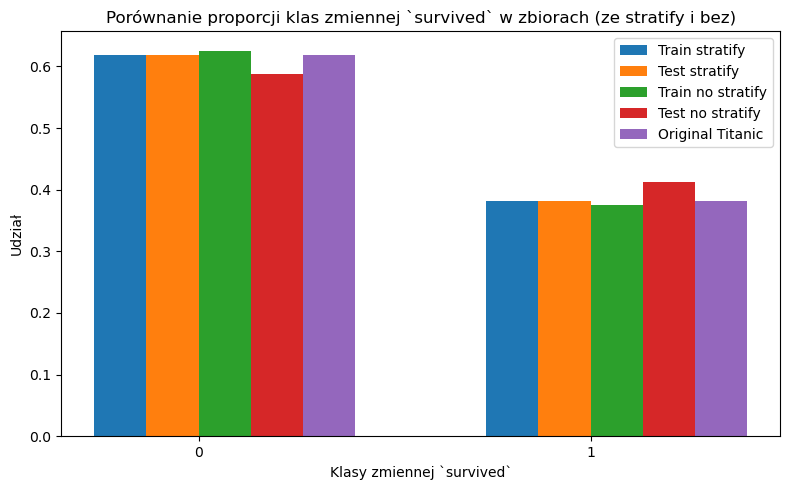

In [26]:
prop_train_strat = y_train.value_counts(normalize=True).sort_index()
prop_test_strat  = y_test.value_counts(normalize=True).sort_index()
prop_train_nostr = y_train_ns.value_counts(normalize=True).sort_index()
prop_test_nostr  = y_test_ns.value_counts(normalize=True).sort_index()
prop_titanic = y.value_counts(normalize=True).sort_index()

classes = prop_train_strat.index

x = np.arange(len(classes)) * 1.5
width = 0.2

plt.figure(figsize=(8, 5))

plt.bar(x - 1.5*width, prop_train_strat.values, width, label='Train stratify')
plt.bar(x - 0.5*width, prop_test_strat.values,  width, label='Test stratify')
plt.bar(x + 0.5*width, prop_train_nostr.values, width, label='Train no stratify')
plt.bar(x + 1.5*width, prop_test_nostr.values,  width, label='Test no stratify')
plt.bar(x + 2.5*width, prop_titanic.values,     width, label='Original Titanic')

plt.xticks(x, classes)
plt.xlabel('Klasy zmiennej `survived`')
plt.ylabel('Udział')
plt.title('Porównanie proporcji klas zmiennej `survived` w zbiorach (ze stratify i bez)')
plt.legend()
plt.tight_layout()
plt.show()


Z barplotu widać, że `stratify` pozwoliła na podział danych w taki sposób, aby jak najlepiej przedstawić jak na oryginalnym zbiorze danych. Bez `stratify` % 'survived' różnią się od tego w oryginalnych danych oraz również mamy nierównomierność w zbiorach testowym i treningowym. 

4.  Sprawdź, czy rozkład wartości w kolumnach jest podobny w obu zbiorach.

In [27]:
print("\n--- Rozkład zmiennych jakościowych w zbiorach treningowym i testowym (ze stratify) ---")
for col in col_name:
    print(f'\n\n{col}:')
    print('Train:')
    print(X_train[col].value_counts(normalize=True))
    print('Test:')
    print(X_test[col].value_counts(normalize=True))
    
print("\n--- Rozkład zmiennych jakościowych w zbiorach treningowym i testowym (bez stratify) ---")
for col in col_name:
    print(f'\n\n{col}:')
    print('Train:')
    print(X_train_ns[col].value_counts(normalize=True))
    print('Test:')
    print(X_test_ns[col].value_counts(normalize=True))


--- Rozkład zmiennych jakościowych w zbiorach treningowym i testowym (ze stratify) ---


CabinReduced:
Train:
CabinReduced
C    0.324444
B    0.213333
D    0.182222
E    0.137778
A    0.075556
F    0.053333
G    0.013333
Name: proportion, dtype: float64
Test:
CabinReduced
C    0.300000
B    0.242857
E    0.142857
F    0.128571
A    0.085714
D    0.071429
G    0.028571
Name: proportion, dtype: float64


sex:
Train:
sex
male      0.644699
female    0.355301
Name: proportion, dtype: float64
Test:
sex
male      0.641221
female    0.358779
Name: proportion, dtype: float64

--- Rozkład zmiennych jakościowych w zbiorach treningowym i testowym (bez stratify) ---


CabinReduced:
Train:
CabinReduced
C    0.293333
B    0.222222
D    0.146667
E    0.142222
A    0.093333
F    0.084444
G    0.017778
Name: proportion, dtype: float64
Test:
CabinReduced
C    0.400000
B    0.214286
D    0.185714
E    0.128571
A    0.028571
F    0.028571
G    0.014286
Name: proportion, dtype: float64


sex:
Train:
sex
m

W zbiorach treningowym i testowym stworzonych przy `stratify=y` (ten, którym będę się zajmować) wszystkie kabiny znajdują się w obu zbiorach, ale są podzielone nierównomiernie (tzn. że ilość danych pokładów różni się w obu zbiorach), a jeśli chodzi o płeć to podział jest praktycznie taki sam.

Jeśli chodzi o zbiory treningowy i testowy stworzonych przy `stratify=None` kabiny znajdują się również w obu zbiorach i zostały również podzielone nierównomiernie. Płeć jest mniej równomiernie podzielona w zbiorach, ale różnica nie jest duża.

5. Wykonaj kodowanie zmiennych kategorycznych przy użyciu LabelEncoder. Porównaj wyniki przed i po.

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in col_name:
    encoder.fit(X_train[col].astype(str))
    X_train[col + '_map'] = encoder.transform(X_train[col].astype(str))
    X_test[col + '_map'] = encoder.transform(X_test[col].astype(str))
    
for col in col_name:
    print(f"\nKolumna: {col}")
    print("Unikalne przed (train):", X_train[col].unique())
    print("Unikalne po (train):", X_train[col + '_map'].unique())
    print("Unikalne przed (test):", X_test[col].unique())
    print("Unikalne po (test):", X_test[col + '_map'].unique())


Kolumna: CabinReduced
Unikalne przed (train): [nan 'F' 'C' 'B' 'E' 'D' 'A' 'G']
Unikalne po (train): [7 5 2 1 4 3 0 6]
Unikalne przed (test): [nan 'D' 'B' 'F' 'C' 'E' 'A' 'G']
Unikalne po (test): [7 3 1 5 2 4 0 6]

Kolumna: sex
Unikalne przed (train): ['female' 'male']
Unikalne po (train): [0 1]
Unikalne przed (test): ['female' 'male']
Unikalne po (test): [0 1]


Za pomocą kodu powyżej zakodowałem za pomocą liczb etykiety (wraz z NaN) wykorzystując LabelEncoder z pakietu scikit-learn. CabinReduced zostało zakodowane w liczbach od 0 do 7 (gdzie 7 to NaN) oraz sex na 0 lub 1.

6. Sprawdź i uzupełnij brakujące wartości wypełniając ich braki zerami za pomocą funkjci filllna().

In [29]:
print(X_train.isna().sum())
for col in col_name:
    X_train[col + "_0"] = X_train[col].fillna(0)
    X_test[col + "_0"] = X_test[col].fillna(0)
X_train.head(10)

CabinReduced        822
sex                   0
CabinReduced_map      0
sex_map               0
dtype: int64


,CabinReduced,sex,CabinReduced_map,sex_map,CabinReduced_0,sex_0
999,NaN,female,7,0,0,female
392,NaN,female,7,0,0,female
628,NaN,female,7,0,0,female
1165,NaN,male,7,1,0,male
604,NaN,female,7,0,0,female
605,F,male,5,1,F,male
25,NaN,male,7,1,0,male
1278,NaN,male,7,1,0,male
196,C,male,2,1,C,male
1292,NaN,male,7,1,0,male


Za pomocą kodu powyżej wypełniono braki zawarte tylko w CabinReduced przy pomocy liczby 0.

7. Spróbuj innej metody imputacji brakujących wartości i porównaj wyniki. Krótko opisz z uwzględnieniem ich użycia do typu zmiennej (kategoryczna czy nie). Oto kilka możliowości:

a) `SimpleImputer(strategy='most_frequent')`

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_imp = pd.DataFrame(X_train_imp,
                           columns=X_train.columns,
                           index=X_train.index)
X_test_imp = pd.DataFrame(X_test_imp,
                          columns=X_test.columns,
                          index=X_test.index)

for col in col_name:
    X_train[col + "_mf"] = X_train_imp[col]
    X_test[col + "_mf"] = X_test_imp[col]

for col in col_name: 
    print(f"\nKolumna: {col}") 
    print("Unikalne PRZED (train):", X_train[col].unique()) 
    print("Unikalne PO (train):", X_train[col + "_mf"].unique())
    print("Unikalne PRZED (test):", X_test[col].unique())
    print("Unikalne PO (test):", X_test[col + "_mf"].unique())


Kolumna: CabinReduced
Unikalne PRZED (train): [nan 'F' 'C' 'B' 'E' 'D' 'A' 'G']
Unikalne PO (train): ['C' 'F' 'B' 'E' 'D' 'A' 'G']
Unikalne PRZED (test): [nan 'D' 'B' 'F' 'C' 'E' 'A' 'G']
Unikalne PO (test): ['C' 'D' 'B' 'F' 'E' 'A' 'G']

Kolumna: sex
Unikalne PRZED (train): ['female' 'male']
Unikalne PO (train): ['female' 'male']
Unikalne PRZED (test): ['female' 'male']
Unikalne PO (test): ['female' 'male']


Wykorzystałem powyżej metode `SimpleImputer(strategy='most_frequent')` i zapisałem w nowych kolumnach wyniki. Jak widać powyżej, najczęściej występującą etykietą w CabinReduced było 'C', a jeśli chodzi o sex to etykiety bez zmian (bo były tutaj wypełnione dane).

b) `fillna('brak danych')`

In [31]:
for col in col_name:
    X_train[col + "_bd"] = X_train[col].fillna('brak danych')
    X_test[col + "_bd"] = X_test[col].fillna('brak danych')

for col in col_name: 
    print(f"\nKolumna: {col}") 
    print("Unikalne PRZED (train):", X_train[col].unique()) 
    print("Unikalne PO (train):", X_train[col + "_bd"].unique())
    print("Unikalne PRZED (test):", X_test[col].unique())
    print("Unikalne PO (test):", X_test[col + "_bd"].unique())


Kolumna: CabinReduced
Unikalne PRZED (train): [nan 'F' 'C' 'B' 'E' 'D' 'A' 'G']
Unikalne PO (train): ['brak danych' 'F' 'C' 'B' 'E' 'D' 'A' 'G']
Unikalne PRZED (test): [nan 'D' 'B' 'F' 'C' 'E' 'A' 'G']
Unikalne PO (test): ['brak danych' 'D' 'B' 'F' 'C' 'E' 'A' 'G']

Kolumna: sex
Unikalne PRZED (train): ['female' 'male']
Unikalne PO (train): ['female' 'male']
Unikalne PRZED (test): ['female' 'male']
Unikalne PO (test): ['female' 'male']


Wykorzystałem powyżej metode `fillna('brak danych')` i zapisałem w nowych kolumnach wyniki. Jak widać powyżej, zamiast NaN widnieje informacja 'brak danych', a jeśli chodzi o sex to etykiety bez zmian (bo były tutaj wypełnione dane).

c) `SimpleImputer(strategy='median')`

In [32]:
col_name_num = [col + '_map' for col in col_name]
imputer_num = SimpleImputer(strategy='median')
imputer_num.fit(X_train[col_name_num])

X_train_num = imputer_num.transform(X_train[col_name_num])
X_test_num  = imputer_num.transform(X_test[col_name_num])

X_train_num = pd.DataFrame(X_train_num,
                           columns=col_name_num,
                           index=X_train.index)

X_test_num = pd.DataFrame(X_test_num,
                          columns=col_name_num,
                          index=X_test.index)

for base_col, map_col in zip(col_name, col_name_num):
    X_train[base_col + "_med"] = X_train_num[map_col]
    X_test[base_col + "_med"]  = X_test_num[map_col]

for base_col, map_col in zip(col_name, col_name_num):
    print(f"\nKolumna mapowana: {map_col}")
    print("Unikalne PRZED (train):", X_train[map_col].unique())
    print("Unikalne PO (train):", X_train[base_col + "_med"].unique())
    print("Unikalne PRZED (test):", X_test[map_col].unique())
    print("Unikalne PO (test):", X_test[base_col + "_med"].unique())

X_train.head(10)


Kolumna mapowana: CabinReduced_map
Unikalne PRZED (train): [7 5 2 1 4 3 0 6]
Unikalne PO (train): [7. 5. 2. 1. 4. 3. 0. 6.]
Unikalne PRZED (test): [7 3 1 5 2 4 0 6]
Unikalne PO (test): [7. 3. 1. 5. 2. 4. 0. 6.]

Kolumna mapowana: sex_map
Unikalne PRZED (train): [0 1]
Unikalne PO (train): [0. 1.]
Unikalne PRZED (test): [0 1]
Unikalne PO (test): [0. 1.]


,CabinReduced,sex,CabinReduced_map,sex_map,CabinReduced_0,sex_0,CabinReduced_mf,sex_mf,CabinReduced_bd,sex_bd,CabinReduced_med,sex_med
999,NaN,female,7,0,0,female,C,female,brak danych,female,7.0,0.0
392,NaN,female,7,0,0,female,C,female,brak danych,female,7.0,0.0
628,NaN,female,7,0,0,female,C,female,brak danych,female,7.0,0.0
1165,NaN,male,7,1,0,male,C,male,brak danych,male,7.0,1.0
604,NaN,female,7,0,0,female,C,female,brak danych,female,7.0,0.0
605,F,male,5,1,F,male,F,male,F,male,5.0,1.0
25,NaN,male,7,1,0,male,C,male,brak danych,male,7.0,1.0
1278,NaN,male,7,1,0,male,C,male,brak danych,male,7.0,1.0
196,C,male,2,1,C,male,C,male,C,male,2.0,1.0
1292,NaN,male,7,1,0,male,C,male,brak danych,male,7.0,1.0


Wykorzystałem powyżej metode `SimpleImputer(strategy='median')` i zapisałem w nowych kolumnach wyniki. Jak widać powyżej, nic się nie zmieniło, ponieważ NaNy w CabinReduced zostały zakodowane wcześniej jako 7, a jeśli chodzi o sex to etykiety bez zmian (bo były tutaj wypełnione dane).

8. Porównaj liczbę unikalnych wartości przed i po kodowaniu.

In [33]:
print("\n--- Liczba unikalnych danych przed ---")
for col in col_name:
    print(f"Kolumna '{col}':\n\t- zbiór testowy: {len(X_test[col].unique())}\n\t- zbiór treningowy: {len(X_train[col].unique())}\n\n")
    
print("\n--- Liczba unikalnych danych po różnych metodach uzupełniania braków ---")
for col in X_train.columns.tolist()[2::]:
    print(f"Kolumna '{col}':\n\t- zbiór testowy: {len(X_test[col].unique())}\n\t- zbiór treningowy: {len(X_train[col].unique())}\n\n")


--- Liczba unikalnych danych przed ---
Kolumna 'CabinReduced':
	- zbiór testowy: 8
	- zbiór treningowy: 8


Kolumna 'sex':
	- zbiór testowy: 2
	- zbiór treningowy: 2



--- Liczba unikalnych danych po różnych metodach uzupełniania braków ---
Kolumna 'CabinReduced_map':
	- zbiór testowy: 8
	- zbiór treningowy: 8


Kolumna 'sex_map':
	- zbiór testowy: 2
	- zbiór treningowy: 2


Kolumna 'CabinReduced_0':
	- zbiór testowy: 8
	- zbiór treningowy: 8


Kolumna 'sex_0':
	- zbiór testowy: 2
	- zbiór treningowy: 2


Kolumna 'CabinReduced_mf':
	- zbiór testowy: 7
	- zbiór treningowy: 7


Kolumna 'sex_mf':
	- zbiór testowy: 2
	- zbiór treningowy: 2


Kolumna 'CabinReduced_bd':
	- zbiór testowy: 8
	- zbiór treningowy: 8


Kolumna 'sex_bd':
	- zbiór testowy: 2
	- zbiór treningowy: 2


Kolumna 'CabinReduced_med':
	- zbiór testowy: 8
	- zbiór treningowy: 8


Kolumna 'sex_med':
	- zbiór testowy: 2
	- zbiór treningowy: 2




Jak widać z informacji powyżej ilość etykiet w obu zbiorach we wszystkich cechach się nie zmieniła (lub zmniejszyła się jeśli zinputowaliśmy brakującą wartość), a więc raczej nie utracono żadnej informacji, która może się przydać przy tworzeniu modelu.

9. Krótko omów wnioski z ćwiczenia odnośnie: 

- reprezentatywność zbiorów treningowego i testowego;

- wpływ imputacji braków i kodowania;

- znaczenie stratyfikacji przy podziale danych.

9.1 Reprezentatywność zbiorów treningowego i testowego

Aby uzyskać reprezentatywne zbiory treningowe i testowe, należy podzielić dane losowo, zachowując proporcje klas takie same jak w oryginalnym zbiorze. W celu osiągnięcia tego celu użyłem argumentu `stratify=y` w funkcji `train_test_split()` z pakietu `scikit-learn`. Tak więc podział został wykonany, aby zbiory najlepiej odzwierciedlały pierwotne proporcje. Jeśli chodzi o poszczególne zmienne (CabinReduced i sex), wszystkie etykiety znajdują się w każdym zbiorze, chociaż ich proporcje różnią się między zbiorami w kolumnie CabinReduced.

9.2 Wpływ imputacji braków i kodowania

Kolumny wraz z brakami danych zostały zakodowane za pomocą ordinar-encoding przez co teoretycznie nie ma braków danych z powodu uznania braków jako nowa kategoria.

Braki danych w kolumnie CabinReduced zostały zinputowane na 4 sposoby:

- fillna(0) - w tym przypadku wartości NaN zostały uzupełnione zerami i zapisane w kolumnie \<feature\>_map. CabinReduced była jedyną kolumną, w której zastosowano tę metodę. Niestety, takie wypełnienie nie zawiera żadnych ważnych informacji, a wręcz może prowadzić do błędnej interpretacji modelu — zero może być postrzegane jako prawdziwa etykieta, podczas gdy w rzeczywistości oznacza brak danych. Analogicznie osoba analizująca dane może również mylnie odebrać tę wartość.

- fillna('brak danych') - w tym przypadku wartości NaN zostały wypełnione etykietą 'brak danych' (w kolumnie \<feature\>_bd), która bezpośrednio informuje analityka i model o braku danych. Sama etykieta może zostać uznana jako nowa kategoria.

- SimpleImputer(strategy='most_frequent') - w tym przypadku etykieta o największej częstotliwości w danej kolumnie została zapisana w kolumnie \<feature\>_mf, a nie wartości NaN. CabinReduced wypełnił brakujące wartości literą „C”, ponieważ była to najczęściej występująca etykieta. Dzięki temu braki w kolumnie zostały usunięte. Jednak ta metoda zaburza rozkład danych i może fałszować pewne zależności. Moim zdaniem lepszym rozwiązaniem byłoby podzielenie oryginalnego zbioru na różne klasy, a następnie wypełnienie błędów w każdej klasie etykietą, która jest najczęściej stosowana. Dzięki temu imputacja byłaby bardziej zgodna z strukturą danych w rzeczywistości.

- SimpleImputer(strategy='median') - W tym przypadku braki w zmiennych numerycznych (\<feature\>_map) miały zostać uzupełnione najczęściej występującą wartością (\<feature\>_med) . W praktyce jednak nic nie zostało wypełnione, ponieważ zakodowane etykiety traktują brak danych jako odrębną kategorię. Gdyby jednak faktycznie istniały braki i zostały one zastąpione najczęściej występującą wartością, to – podobnie jak wcześniej – mogłoby to prowadzić do zafałszowania informacji oraz zaburzenia rozkładu danych. Sugerowane rozwiązanie problemu pozostaje takie samo jak w poprzednim przypadku.

9.3 Znaczenie stratyfikacji przy podziale danych:

Wykorzystanie argumentu `stratify` w train_test_split() pozwala na zachoowanie proporcji danej zmiennej w zbiorach treningowym i testowym tak jak w orginalnych danych. Dzięki temu, zbiory stają się bardziej reprezentatywne (przypominają bardziej całe dane, czyli populacje), co może poprawić działanie modelu. Bez `stratify` dane mogą być podzielone w niewłaściwy sposób np. większość pasażerów, którzy nie przeżyli może znajdować się w zbiorze treningowym, kiedy całość pasażerów, którzy przeżyli mogą być w zbiorze testwym itp. Ogólnie brak zachowania proporcji w zbiorach może wpłynąć negatywnie na model z powodu np. braku pewnych informacji.

<div align="center">

#### Uczenie maszynowe | Inżynieria i Analiza Danych
# ML Pipline
### Mateusz Bugdol  
### Nr indeksu: 419719  
### Grupa ćwiczeniowa: 1 
 
</div>

1. Używając kodu z poprzednich zajęć wczytaj dane i podziel na zbiory treningowy i testowy z uwzględnieniem rozłożenia klas.

In [34]:
col_name = ['CabinReduced', 'sex']
X = titanic[col_name]
y = titanic['survived']

In [35]:
from sklearn.model_selection import train_test_split

print("\n--- Podział zbioru danych na zbiór treningowy i testowy z opcją stratify ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7321, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


--- Podział zbioru danych na zbiór treningowy i testowy z opcją stratify ---
(1047, 2) (262, 2)
survived
0    0.617956
1    0.382044
Name: proportion, dtype: float64
survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64


2. Przygotuj Pipeline dla zmiennych kategorycznych. Chcemy automatycznie uzupełnić brakujące wartości (SimpleImputer) oraz zamienić kategorie na zmienne liczbowe (OneHotEncoder). Czy wystarczy nam tutaj użycie OneHotEncodera?

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_features = ['CabinReduced', 'sex']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

Moim zdaniem samo użycie OneHotEncoder byłoby technicznie wystarczające, ponieważ jeśli w danych treningowych występują wartości NaN, encoder potraktuje je jak zwykłą kategorię i utworzy dla nich osobną kolumnę. W takim wariancie brakujące wartości zostają poprawnie zakodowane i nie powodują żadnych błędów. W naszym przypadku stosujemy jednak dodatkowo SimpleImputer, który zastępuje każdy brak najczęściej występującą wartością. Dzięki temu NaN nie jest już osobną kategorią, lecz zostaje włączony do dominującej klasy. Zmienia to sposób reprezentacji danych i może wpływać na zachowanie modelu, ponieważ brak informacji nie jest już sygnałem samym w sobie, lecz zostaje ukryty przez imputację.

    Co robi handle_unknown='ignore' w OneHotEncoder?

Zgodnie ze [źródłem](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) "Gdy podczas transformacji zostanie napotkana nieznana kategoria, wynikowe kolumny typu one-hot dla tej cechy będą miały same zera. Przy odwrotnej transformacji nieznana kategoria zostanie oznaczona jako `None`"

    Dlaczego warto użyć ColumnTransformer zamiast Pipeline dla każdej kolumny osobno?

ColumnTransformer umożliwia równoległe i zoptymalizowane przetwarzanie wielu kolumn w jednej strukturze, zapewniając spójne fit/transform, automatyczne scalanie wyników oraz pełną kompatybilność z Pipeline i walidacją krzyżową. Oddzielne pipeliny wymagałyby ręcznego wycinania i łączenia danych, wielu przebiegów przez macierz wejściową oraz zwiększałyby ryzyko błędów wymiarów i niespójności danych.

3. Teraz spróbuj dodać model.

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(random_state=7321))
])

4. Wykonaj trening modelu i przetestuj pipline.

In [38]:
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(f'Dokładność: {acc:.3f}')

Dokładność: 0.786


5. Sprawdź przetworzone dane

In [39]:
from sklearn import set_config
set_config(display='diagram')  # pokazuje schemat pipeline
model

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Dodatkowe zadania które należy KRÓTKO skomentować:

        - Sprawdź, czy liczba braków została poprawnie uzupełniona.

In [40]:
Xt_train = model.named_steps['prep'].fit_transform(X_train)
print(f"Liczba braków po uzupełnieniu: {np.isnan(Xt_train.toarray()).sum()}")
Xt_test = model.named_steps['prep'].transform(X_test)
print(f"Liczba braków po uzupełnieniu: {np.isnan(Xt_test.toarray()).sum()}")

Liczba braków po uzupełnieniu: 0
Liczba braków po uzupełnieniu: 0


Jak widać powyżej liczba braków jest równa zero, a więc poprawnie wyimputowano dane treningowe i testowe. Wykorzystaliśmy `SimpleImputer(strategy='most_frequent')`, a dzięki temu braki danych są wypełnione najczęściej występującą etykietą w danej kolumnie w danych treningowych (i analogicznie wyimputowane w zbiorze testowym).

        - Czy liczba nowych kolumn po OneHotEncoder jest zgodna z oczekiwaniami? Czy OneHotEncoder był wystarczający?

In [41]:
ohe = model.named_steps['prep'].named_transformers_['cat'].named_steps['encoder']
print(f"Nazwy feature'ów: {ohe.get_feature_names_out()}")
print(f"Liczba feature'ów: {len(ohe.get_feature_names_out())}")

Nazwy feature'ów: ['x0_A' 'x0_B' 'x0_C' 'x0_D' 'x0_E' 'x0_F' 'x0_G' 'x1_female' 'x1_male']
Liczba feature'ów: 9


Jak widać powyżej, liczba wygenerowanych kolumn wynosi 9, co jest zgodne z oczekiwaniami. CabinReduced zostało zakodowane do siedmiu kategorii, a sex do dwóch. Oznacza to, że transformacja przebiegła prawidłowo, a brakujące wartości zostały wcześniej uzupełnione, dzięki czemu OneHotEncoder nie tworzył dodatkowych kolumn dla NaN. W tym przypadku OneHotEncoder poprawnie zakodował wszystkie dostępne etykiety, natomiast to wcześniejsze zastosowanie SimpleImputer sprawiło, że brak danych nie został potraktowany jako osobna kategoria.

        - Co by się stało, gdyby w zbiorze testowym pojawiła się nowa kategoria? Pojawiła się w tym przypadku?

In [42]:
train_cols = {col: X_train[col].unique() for col in cat_features}

test_cols = {col: X_test[col].unique() for col in cat_features}

for col in cat_features:
    new = set(test_cols[col]) - set(train_cols[col])
    print(col, "-> nowe kategorie:", new)

CabinReduced -> nowe kategorie: set()
sex -> nowe kategorie: set()


Gdyby w zbiorze testowym pojawiła się nowa, wcześniej niewystępująca kategoria, OneHotEncoder z ustawieniem handle_unknown='ignore' nie zgłosiłby błędu i zakodowałby tę wartość jako wektor samych zer w odpowiedniej grupie kolumn. Oznacza to, że żadna z istniejących binarnych kolumn nie zostałaby ustawiona na 1, ponieważ nowa kategoria nie była znana podczas uczenia encoder’a. W naszym przypadku taka sytuacja nie wystąpiła. Po porównaniu unikalnych wartości w zbiorze treningowym i testowym widać, że zarówno w kolumnie CabinReduced, jak i sex nie pojawiły się żadne nowe kategorie (set()), więc wszystkie wartości w teście zostały poprawnie odwzorowane przez encoder.